In [2]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
import os
%matplotlib inline

In [3]:
os.chdir('E:\\sentimental analysis')

In [4]:
train  = pd.read_csv('train_E6oV3lV.csv')
test = pd.read_csv('test_tweets_anuFYb8.csv')

In [5]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [6]:
#combining test and train dataset
combi = train.append(test, ignore_index=True)

C:\py\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [10]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt  

In [36]:
 #remove twitter handles (@user)
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")

In [23]:
"former tweet:{} and cleaned tweet{}".format(combi['tweet'],combi['tidy_tweet'])

'former tweet:0         @user when a father is dysfunctional and is s...\n1        @user @user thanks for #lyft credit i can\'t us...\n2                                      bihday your majesty\n3        #model   i love u take with u all the time in ...\n4                   factsguide: society now    #motivation\n5        [2/2] huge fan fare and big talking before the...\n6         @user camping tomorrow @user @user @user @use...\n7        the next school year is the year for exams.ð\x9f\x98...\n8        we won!!! love the land!!! #allin #cavs #champ...\n9         @user @user welcome here !  i\'m   it\'s so #gr...\n10        â\x86\x9d #ireland consumer price index (mom) climb...\n11       we are so selfish. #orlando #standwithorlando ...\n12       i get to see my daddy today!!   #80days #getti...\n13       @user #cnn calls #michigan middle school \'buil...\n14       no comment!  in #australia   #opkillingbay #se...\n15       ouch...junior is angryð\x9f\x98\x90#got7 #junior #yugyo...\n1

In [37]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, a, father, is, dysfunctional, and, is, ...
1    [thanks, for, #lyft, credit, i, can't, use, ca...
2                              [bihday, your, majesty]
3    [#model, i, love, u, take, with, u, all, the, ...
4             [factsguide:, society, now, #motivation]
Name: tidy_tweet, dtype: object

In [38]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

In [39]:
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [when, a, father, is, dysfunct, and, is, so, s...
1    [thank, for, #lyft, credit, i, can't, use, cau...
2                              [bihday, your, majesti]
3    [#model, i, love, u, take, with, u, all, the, ...
4                  [factsguide:, societi, now, #motiv]
Name: tidy_tweet, dtype: object

In [40]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combi['tidy_tweet'] = tokenized_tweet


In [43]:
all_words = ' '.join([text for text in combi['tidy_tweet']])
print(all_words)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [45]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

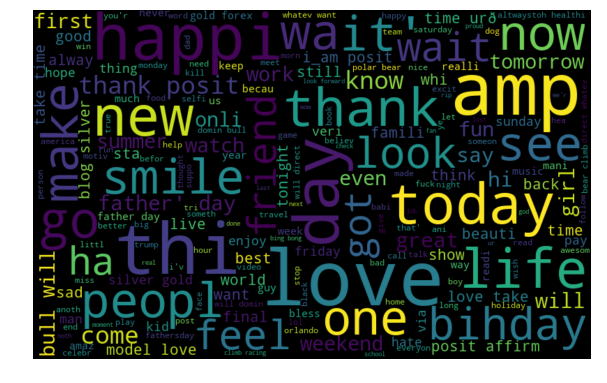

In [46]:
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

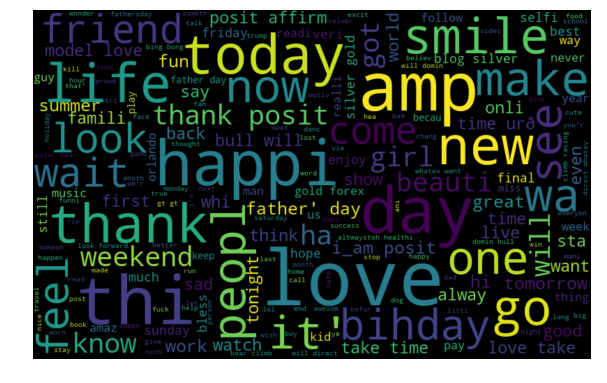

In [47]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

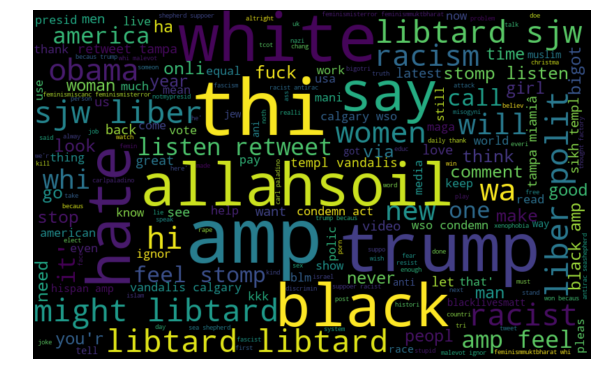

In [48]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [49]:
#hashtags extract
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [63]:
HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0])

In [58]:
# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1])
print(HT_negative)

[['cnn', 'michigan', 'tcot'], ['australia', 'opkillingbay', 'seashepherd', 'helpcovedolphin', 'thecov', 'helpcovedolphin'], [], [], ['neverump', 'xenophobia'], ['love', 'peac'], [], ['race', 'ident', 'medâ'], ['altright', 'whitesupremaci'], ['linguist', 'race', 'power', 'raciolinguist'], ['brexit'], ['peopl', 'trump', 'republican'], ['michelleobama'], ['knick', 'golfâ'], ['jewishsupremacist'], ['libtard', 'sjw', 'liber', 'polit'], ['trash', 'hate'], [], ['â'], ['stereotyp', 'prejudic', 'hope', 'hate', 'conflictâ'], ['pol', 'bluelivesmatt', 'draintheswamp', 'ferguson'], ['2016'], ['antisemit', 'hocoschool', 'columbiamd', 'hocomd'], ['nazi', 'hatred', 'bigotri'], ['libtard', 'sjw', 'liber', 'polit'], ['p2', 'p21', 'fyi', 'tcot'], ['topoli'], ['blacklivesmatt'], ['ushistori', 'eugen'], ['biher', 'bigotri', 'altright', 'potu', 'theresist'], ['crime', 'officerâ'], [], ['black', 'retweet', 'tampa', 'miamiâ'], ['allahsoil'], [], ['prais', 'cleveland', 'rnc', 'white', 'tamirric', 'rip'], ['big

In [65]:
# unnesting list
HT_regular = sum(HT_regular,[])


TypeError: can only concatenate list (not "str") to list

In [62]:
HT_negative = sum(HT_negative,[])

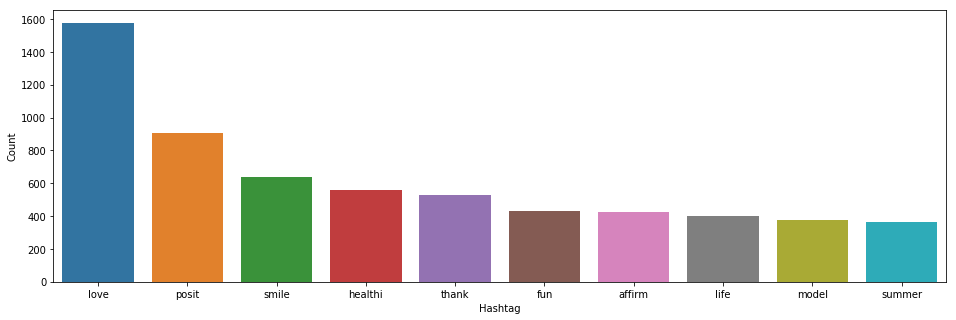

In [66]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

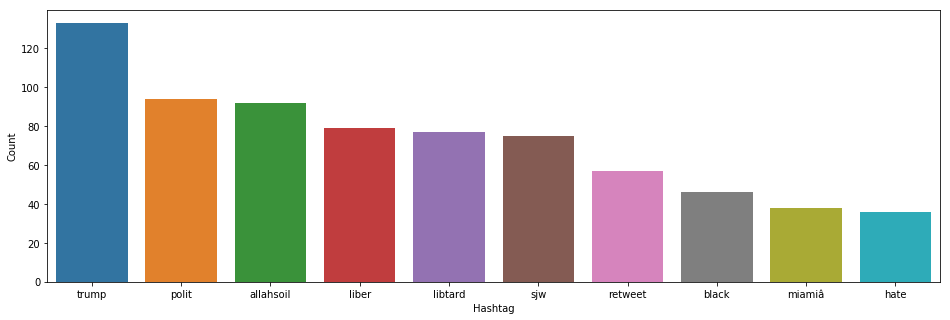

In [67]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [68]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])

In [69]:
print(bow)

  (0, 732)	1
  (0, 471)	1
  (0, 419)	2
  (0, 309)	1
  (1, 604)	1
  (1, 252)	1
  (1, 154)	1
  (1, 911)	1
  (1, 858)	1
  (2, 105)	1
  (3, 908)	1
  (3, 868)	1
  (3, 526)	1
  (3, 564)	1
  (4, 574)	1
  (5, 633)	1
  (5, 97)	1
  (5, 843)	1
  (5, 103)	1
  (5, 304)	1
  (5, 436)	1
  (6, 874)	1
  (6, 146)	1
  (7, 360)	1
  (7, 403)	1
  :	:
  (49155, 314)	1
  (49155, 505)	1
  (49156, 422)	1
  (49156, 147)	1
  (49156, 237)	1
  (49156, 963)	2
  (49156, 614)	1
  (49156, 505)	1
  (49156, 740)	1
  (49156, 53)	2
  (49156, 613)	1
  (49156, 871)	1
  (49156, 911)	1
  (49157, 400)	1
  (49157, 619)	1
  (49157, 236)	1
  (49157, 208)	1
  (49157, 489)	1
  (49157, 561)	2
  (49157, 724)	1
  (49157, 190)	1
  (49157, 964)	2
  (49158, 361)	1
  (49158, 794)	1
  (49158, 340)	1


In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])

In [71]:
#building the model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score


In [72]:
train_bow = bow[:31962,:]
test_bow = bow[31962:,:]


In [73]:
# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)

In [74]:
lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [75]:
# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)


In [76]:
prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) # calculating f1 score

0.5587044534412955

In [77]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file

In [78]:
#tfidf model
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

0.5598621877691645